In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from skimage.io import imread
from PIL import Image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from utils import blackbox_inference, submit

token = "8ZYRkMBfW1"

# 1. Whitebox

## a) Loading Model

In [19]:
model = load_model("model-final.h5")

## b) Loading image

In [20]:
im = imread("Images/whitebox/1.ppm")

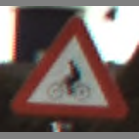

In [21]:
im_pil = Image.fromarray(im)
im_pil

## c) Inference

In [22]:
# Apply pre processing of the model
im = im.astype(np.float32)
im = preprocess_input(im)

In [35]:
# Predict
probabilities = model.predict(np.array([im]))[0]
class_id = np.argmax(probabilities)
class_id

[[[177 129 103]
  [123  87  67]
  [ 83  63  51]
  ...
  [ 21  18  17]
  [ 24  21  20]
  [ 26  24  22]]

 [[201 162 125]
  [143 114  86]
  [103  87  69]
  ...
  [ 21  19  17]
  [ 24  24  20]
  [ 27  26  22]]

 [[202 175 137]
  [148 130 101]
  [113 110  91]
  ...
  [ 27  22  21]
  [ 29  26  23]
  [ 30  27  24]]

 ...

 [[ 66  73  75]
  [ 67  73  76]
  [ 67  74  76]
  ...
  [ 85  88  87]
  [ 89  89  88]
  [ 90  90  88]]

 [[ 66  72  75]
  [ 67  73  76]
  [ 68  74  76]
  ...
  [ 82  88  89]
  [ 87  89  90]
  [ 89  90  90]]

 [[ 67  72  75]
  [ 67  72  75]
  [ 68  73  76]
  ...
  [ 77  83  86]
  [ 81  86  88]
  [ 84  88  89]]]
(165,)


46

In [24]:
probabilities[class_id]

1.0

## d) Check the model prediction

In [25]:
mapping = pd.read_csv('mapping.csv', index_col=0)

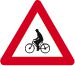

In [26]:
Image.open(mapping.loc[class_id]["image_path"])

# 2. Blackbox

## a) Submit an image

In [27]:
im = imread("Images/blackbox/1.ppm")

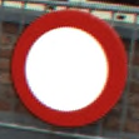

In [28]:
im_pil = Image.fromarray(im)
im_pil

In [29]:
probabilities = blackbox_inference(token, im, label_only=False)

## b) Check the model prediction

In [30]:
class_id = np.argmax(probabilities)
class_id

46

In [31]:
probabilities[class_id]

0.9999477863311768

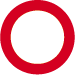

In [15]:
Image.open(mapping.loc[class_id]["image_path"])

# 3. Submission
To submit your adversarial examples. Put all the images in a folder. Keep the same folder strucutre as for the provided Images:
* The folder must have 2 sub-folders called: 'whitebox' and 'blackbox'
* The name of the images should be the same i.e. the adversarial example corresponding to the original image 'Images/whitebox/1.ppm' should be '\<Folder name\>/whitebox/1.ppm'

Then run the following command:

In [4]:
submit("8ZYRkMBfW1", "our_images/")

b'Submission succeeded. '
None
